##**INTRODUÇÃO AO GEOPROCESSAMENTO COM PYTHON**

**Objetivo:** Esta aula irá introduzir os conceitos básicos de geoprocessamento utilizando Python, abordando dados vetoriais e raster, sistemas de coordenadas e projeções.

⛽Baixe os dados para esta aula [aqui](https://drive.google.com/drive/folders/1YOntYAEm1gnr_b8fm-0gSSN6tmP_Okjl?usp=drive_link).

## 1. Introdução ao Geoprocessamento

Geoprocessamento refere-se ao uso de técnicas de processamento de dados espaciais para processamento e análise de informações geográficas. Python é uma linguagem poderosa para geoprocessamento, com diversas bibliotecas que facilitam a análise espacial.

**Principais bibliotecas em Python para Geoprocessamento:**
 - **GeoPandas**: Extensão do Pandas para processamento de dados vetoriais.
 - **Shapely**: Para operações geométricas em dados vetoriais.
 - **Fiona**: Para leitura e gravação de arquivos vetoriais.
 - **Rasterio**: Para processamento de dados raster.
 - **Pyproj**: Para transformação de coordenadas.
 - **Matplotlib** e **Folium**: Para visualização de dados espaciais.

 No geoprocessamento, os dados espaciais podem ser representados principalmente de duas formas: vetorial e raster.


**Dados Vetoriais:**
 - Representam feições geográficas utilizando pontos, linhas e polígonos.
 - Armazenados em formatos como Shapefile (.shp), GeoJSON (.geojson), entre outros.

**Dados Raster:**
 - Representam informações geográficas em uma grade regular de células (pixels).
 - Cada célula possui um valor numérico que representa uma característica da superfície, como elevação ou uso da terra.
 - Armazenados em formatos como GeoTIFF (.tif).

## 3. Dados Vetoriais e Raster

In [ ]:
!pip install geopandas
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 55.9 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Carregando e visualizando dados vetoriais**


 Vamos começar carregando um arquivo vetorial utilizando GeoPandas.

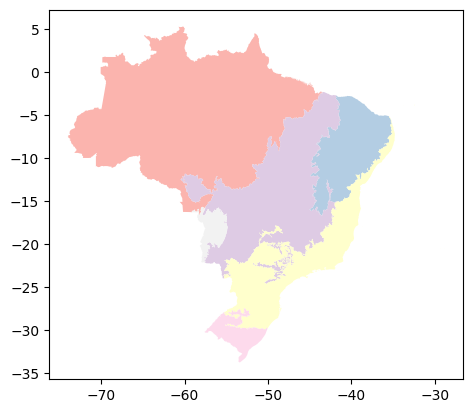

In [ ]:
# Exemplo de carregamento de um shapefile
vetor =gpd.read_file ('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula01/BIOMAS/lm_bioma_250.shp')
# vetor.plot()
vetor.plot(cmap='Pastel1')
plt.show()

**Carregando e visualizando dados raster**


Agora, vamos carregar um arquivo raster utilizando Rasterio.

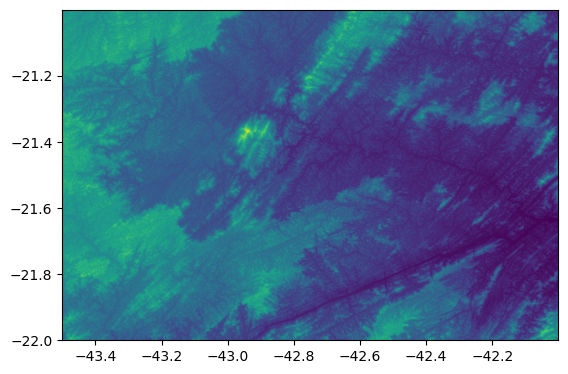

In [ ]:
# Exemplo de carregamento de um raster
raster = rio.open('/content/drive/MyDrive/DADOS_GEOPYTHON/Aula01/SRTM/SF-23-X-D.tif')
show(raster)
plt.show()

Fonte: [Brasil em Relevo](https://www.cnpm.embrapa.br/projetos/relevobr/download/index.htm)


## 4. Sistemas de Coordenadas e Projeções

**Sistemas de Coordenadas**
Um sistema de coordenadas define como as coordenadas espaciais são atribuídas a locais no espaço. Os mais comuns são:
- **Geográfico (latitude/longitude)**: Medidas angulares, baseadas em um esferoide.
- **Projetado (ex: UTM)**: Coordenadas em um plano, ideal para medições precisas em áreas específicas.

**Projeções Cartográficas**
A projeção cartográfica é um método de representação da superfície curva da Terra em um plano.

**Reprojeção de camadas**



Vamos verificar o Sistema de Referência de Coordenadas (SRC) dos dados que foram abertos.

In [ ]:
print(vetor.crs)
print(raster.crs)

EPSG:4674
EPSG:4326


Consulte [aqui](https://epsg.io/) os códigos EPSG.

Agora, vamos transformar a camada que está com coordenadas de um sistema projetado (UTM) para um sistema geográfico (latitude/longitude).

In [ ]:
vetor_sirgas = vetor.to_crs(epsg=31983)
vetor_sirgas.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
vetor_albers = vetor.to_crs('+proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=-42 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs +type=crs')
vetor_albers.crs

<Projected CRS: +proj=aea +lat_0=-32 +lon_0=-60 +lat_1=-5 +lat_2=- ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: Unknown based on Australian Natl & S. Amer. 1969 ellipsoid
- Ellipsoid: Australian Natl & S. Amer. 1969
- Prime Meridian: Greenwich

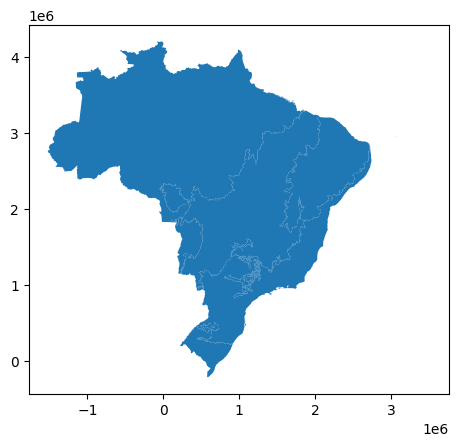

In [ ]:
vetor_albers.plot()
plt.show()

O que mudou na figura?

- Para definir o SRC: GeoDataFrame.set_crs

- Para reprojetar: GeoDataFrame.to_crs


**Transformação de coordenadas**

Biblioteca pyproj

In [ ]:
from pyproj import CRS, Transformer

In [ ]:
# Definindo os sistemas de coordenadas
crs_geografico = CRS.from_epsg(4326)  # WGS84
crs_projetado = CRS.from_epsg(31983)  #SIRGAS 2000 / UTM zone 23S

In [ ]:
# Criando um transformador
transformer = Transformer.from_crs(crs_geografico, crs_projetado)

In [ ]:
# Exemplo de transformação de coordenadas
latitude, longitude = -23.5505, -46.6333  # Coordenadas de São Paulo
lat,long = transformer.transform(latitude, longitude)

In [ ]:
print(f'Coordenadas projetadas: Latitude: {lat}, Longitude: {long}')

Coordenadas projetadas: Latitude: 333287.91510143026, Longitude: 7394588.318636952


E quanto à reprojeção da camada raster?